# Project 3: Cross Validation

### Cross-validation determines the accuracy of your machine learning model by partitioning the data into two different groups, called a training set and a testing set. The data is then randomly separated into a certain number of groups or subsets called folds. Each fold contains about the same amount of data.

### Cross validation can also help determine which parameters and even wich machine learning models we should use!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

sns.set()

In [4]:
## Lets import some new packages!


from sklearn.model_selection import validation_curve

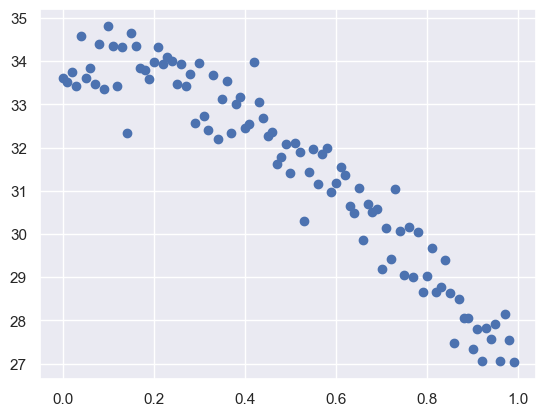

In [5]:
## lets generate some data and view it

X = np.arange(100)/100
y = 3*(X**3)-10*(X**2)+34 + (0.5)*np.random.randn(X.size)

plt.scatter(X,y)

In [6]:
## Ok so first lets try to determine the degrees of a polynomial to fit this curve. 
## Remember that degrees for a polynomial determine how flexable a curve is
## Lets iterate over a few different degrees

degree = np.arange(0,15)

In [7]:
## We're now going to use our PR() or Polynomial Regression function we created in our last lesson!

def PR(degree=2,**kwargs):
    p = make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
    return p

In [8]:
## Now lets also comput our train_score, val_score to be used to determine the accurace across the different degrees we called above
## We will then use the new validation_curve() function and call our PR() function with X, y
## We are setting the degrees for the PolynomialFeatures() model in our PR() function to be assigned to our 'degree' variable or 1-15 
## We then split the data 5 times via the cv to cross validate the data at different intervals to get a more accurate answer

train_score,val_score = validation_curve(PR(),X[:,np.newaxis],y,'polynomialfeatures__degree',degree,cv=5)

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

In [ ]:
## 

plt.plot(degree,np.median(train_score,1),color='green',label="TRS")
plt.plot(degree,np.median(val_score,1),color='red',label="VS")
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")